# Logistic Regression from Scratch

### Review: Linear Regression from Scratch

Note: This is the fundamental of deep learning.  Almost all deep learning operations is based on this weight multiplication.

Solving linear regression is an **optimization** problem. Optimization means finding the optimal - max, min.

$$\theta^* = \argmin_\theta J(\theta)$$

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, )`
    $$ h(\theta) = y = f(x) = \mathbf{X} \cdot \theta$$

2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        $$J(\theta) = \sum_{i=0}^m \frac{(\hat{\mathbf{y}}^{(i)} - \mathbf{y}^{(i)})^2}{2}$$

    2.2 $$\frac{\partial J}{\partial \theta_j} = \sum_{i=0}^m (\hat{\mathbf{y}}^{(i)} - \mathbf{y}^{(i)})\mathbf{x}_j$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)
    

### Let's come back to Logistic Regression

Note: this is also the fundamental of all deep learning, that involves classification.   In deep learning, all operations do something like this....

Logistic Regression is a **classification** algorithm based on linear regression.

Classification - supervised learning - where $y$ is discrete.

Binary - class 0 and 1
Multiclass - > 2 class

Today we will be doing binary.....
This Thurs we will be doing multiclass....

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, )`
    $$ h(\theta) = y = f(x) = \mathbf{X} \cdot \theta$$

    We know that $\texttt{range}(\mathbf{X} \cdot \theta) =  (-\infty, \infty)$

    We need to find a function $g(x)$ such that it maps infinity to 0 and 1.

    That $g(x) = \displaystyle\frac{1}{1 + e^{-x}}$

    So if you combine $g(x)$ with $h(\theta)$, then you will get
    
    $g(h(\theta)) = \displaystyle\frac{1}{1 + e^{-(X \cdot \theta)}}$

2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        
        Note: 
        - the behavior of J is that when y, yhat= (1,1) | (0, 0) , then J = 0
        - the behavior of J is that when y, yhat= (0,1) | (1, 0) , then J = very high


    $$J(\theta) = \sum_{i=0}^m -( \mathbf{y}^{(i)} * \log{\mathbf{h}}^{(i)} + (1 - \mathbf{y}^{(i)})\log(1 - {\mathbf{h}}^{(i)}))$$
             

    2.2 $$\frac{\partial J}{\partial \theta_j} = \mathbf{X}^\top (\hat{\mathbf{y}} - \mathbf{y})$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)

### Let's code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

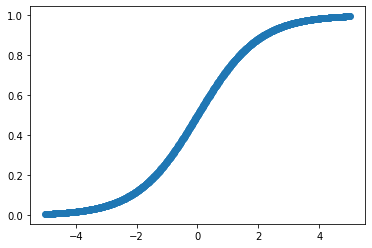

In [2]:
#1. I want you to define this function g(x)
def sigmoid(x):  #logit function, or sigmoid function
    return (1 + np.exp(-x)) ** -1

#2. I want you to simulate x from -5 to 5
x = np.linspace(-5, 5, 1000)  #np.arange(-5, 5, 0.01)
y = sigmoid(x)

#3. Try to plot it
plt.scatter(x, y)


In [3]:
#1. define X with two samples.  
# Sample 1 has egg price = 5, oil price = 10; Sample 2 has egg price = 3, oil price = 4
X = np.array([[5, 10], [3, 4], [9, 1]])
X.shape

#2. define any theta you like
theta = np.random.random((2, ))  #np.ones((X.shape[1], ))
theta.shape

#3. perform X dot theta  #(3, 2) @ (2, ) = (3, )
    #print it
yhat = X.dot(theta)
yhat.shape
    
#4. perform sigmoid on top and see whether the value is really 0 or 1
yhat_sig = sigmoid(yhat)

#5. perform a round to nearest
print(np.round(yhat_sig))

[1. 1. 1.]


$$\mathbf{J}(\theta) = \sum_{i=0}^m -( \mathbf{y}^{(i)} * \log{\mathbf{h}}^{(i)} + (1 - \mathbf{y}^{(i)})\log(1 - {\mathbf{h}}^{(i)}))$$

Good 19.84779709959251
Bad 0.31844724673955827


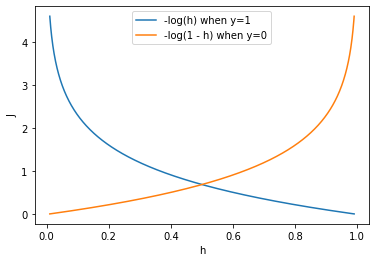

In [4]:
#1. Please code this loss function above.
#h = f(x) = yhat
def binary_cross_entropy(y, yhat):
    return -np.sum(y * np.log(yhat) + (1 - y)*np.log(1 - yhat))

#1.1 Please plot -np.log(h) and -np.log(1 - h), 
# where h is a value between 0.01 to 0.99
h = np.linspace(0.01, 0.99, 1000)
plt.plot(h, -np.log(h),     label="-log(h) when y=1")
plt.plot(h, -np.log(1 - h), label="-log(1 - h) when y=0")
plt.xlabel('h')
plt.ylabel('J')
plt.legend()

#2.1 simulate the actual y
y = np.array([0, 1, 1, 0, 1])

#2.2 simulate a very bad yhat - no good predictions
bad_yhat = np.array([0.88, 0.01, 0.02, 0.99, 0.01])

#2.3 simulate a very good yhat - very good predictions
good_yhat = np.array([0.01, 0.98, 0.92, 0.03, 0.84])

#3. try to get J(\theta) of actual y vs. (1)very bad, (2)very good
print("Good", binary_cross_entropy(y, bad_yhat))
print("Bad", binary_cross_entropy(y, good_yhat))


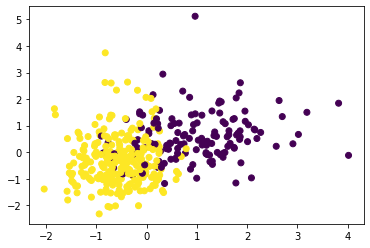

In [5]:
#1. Load breast cancer from sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#2. Set the X and y, split properly, standardize properly
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

#2.1 plot....
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

#format:np.insert(array, position, number, axis=1)
X_train = np.insert(X_train, 0, 1, axis=1)
X_test  = np.insert(X_test, 0, 1, axis=1)

#3. Create a class of Logistic Regression (no need mini-batch, sto, or cross validation)
class LogisticRegression(object):
    
    def __init__(self, num_epochs=5, alpha=0.01):
        self.num_epochs = num_epochs
        self.alpha      = alpha
    
    def binary_cross_entropy(self, y, yhat):
        return -np.sum(y * np.log(yhat) + (1 - y)*np.log(1 - yhat))
    
    def sigmoid(self, h):  #logit function, or sigmoid function
        return (1 + np.exp(-h)) ** -1
    
    def fit(self, X_train, y_train): 
        #create theta
        self.theta = np.ones((X_train.shape[1], ))  #<----this is NOT good
        #loop epochs
        for _ in range(self.num_epochs):
        
            #randomize our X_train
            perm = np.random.permutation(X_train.shape[0])
            X_train = X_train[perm]
            y_train = y_train[perm]
            
            #predict
            yhat = self._predict(X_train)
            
            #grad
            grad = X_train.T @ (yhat - y_train)
            
            #update
            self.theta = self.theta - self.alpha * grad
    
    def _predict(self, X):  #fx, h_theta,
        return self.sigmoid(X @ self.theta)
    
    def predict(self, X):  #return either 0 or 1
        return np.round(self.sigmoid(X @ self.theta))

#4. fit, and predict


#Later....5. I will teach recall, precision, accuracy

In [6]:
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

accuracy_score(y_test, yhat)

0.9532163742690059

In [7]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.95      0.97      0.96        98

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Midterm:
    1. Python
    2. Data Science
    3. Coding from scratch (we will give one equation...)

In [8]:
'''
Confusion matrix
                          Actual
                    1               0
            1    #True pos       #False pos
Predict     

            0    #False neg      #True neg
'''

#Accuracy = TP + FP / (TP + FP + FN + TN)

#but accuracy sucks, when class is imbalanced
#remember the imbalance case we got!
#if we have 10 positives, and 1 negatives
#the model will always get 10 / 11 accuracy

#recall = TP / TP + FN  #penalize FN, it does not like FN, ex. Cancer, Terrorist, Zombie

#precision = TP / TP + FP #penalize FP, it does not like FP, ex. search engine

#f1 = 2 * recall * precision / (precision + recall)  #balance between recall and precision

#btw, recall, precision, f1 are quite robust with imbalanced data...


'\nConfusion matrix\n                          Actual\n                    1               0\n            1    #True pos       #False pos\nPredict     \n\n            0    #False neg      #True neg\n'

In [40]:
#please code the following FROM SCRATCH

def cm(yhat, y):
    
    TP, TN, FP, FN = 0, 0, 0, 0
    
    for i in range(yhat.shape[0]):
        if   (yhat[i] == 1) & (y[i] == 1):
            TP += 1
        elif (yhat[i] == 0) & (y[i] == 0):
            TN += 1
        elif (yhat[i] == 1) & (y[i] == 0):
            FP += 1
        elif (yhat[i] == 0) & (y[i] == 1):
            FN += 1
    
    print("Added everything: ", TP + TN + FP + FN)
    print("yhat samples: ", yhat.shape[0])
    
    assert (TP + TN + FP + FN) == yhat.shape[0]
    
    return TP, TN, FP, FN



In [41]:
yhat.shape, y_test.shape

((171,), (171,))

In [44]:
TP, TN, FP, FN = cm(yhat, y_test)

Added everything:  171
yhat samples:  171


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#ACCURACY
accuracy = (TP + TN) / (TP + TN + FP + FN)

#RECALL
recall  = TP / (TP + FN)

#PRECISION
precision = TP / (TP + FP)

print(accuracy, recall, precision)
print(accuracy_score(y_test, yhat), recall_score(y_test, yhat), precision_score(y_test, yhat))

0.9532163742690059 0.9693877551020408 0.95
0.9532163742690059 0.9693877551020408 0.95
